In [67]:
import pandas as pd 
import numpy as np
import nltk
import string 
import re
import csv

df=pd.read_csv("superheroes_nlp_dataset.csv",encoding="utf-8")


In [8]:
#form new dataframe needed for linear regression
df2 = df[['name','overall_score','intelligence_score','strength_score','speed_score',
         'durability_score','power_score','combat_score']].dropna(how='all').fillna('empty').astype(str)
df2 = df2[~df2['overall_score'].str.contains('-')]
df2= df2[~df2['overall_score'].isin([0])]
#replace ∞ with five times maximum value 
df2 = df2.replace('∞', '500')
df2.head(50)


,name,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
0,3-D Man,6,85,30,60,60,40,70
1,514A (Gotham),10,100,20,30,50,35,100
2,A-Bomb,20,80,100,80,100,100,80
3,Aa,12,80,50,55,45,100,55
4,Aaron Cash,5,80,10,25,40,30,50
5,Aayla Secura,8,90,40,45,55,55,85
6,Abe Sapien,10,95,30,35,65,100,85
7,Abin Sur,9,75,90,55,65,100,65
8,Abomination,22,85,100,80,90,100,95
9,Abra Kadabra (CW),13,100,10,20,30,100,55


In [3]:
#select specific column to form new dataframe needed for clustering
#drop empty rows and fillup empty cells with word empty
df3= df[['name','real_name','full_name','history_text','powers_text','alter_egos','aliases','occupation','superpowers',
         'place_of_birth','first_appearance','creator','alignment', 'base',
         'teams','relatives','gender','type_race','eye_color','skin_color','hair_color']].dropna(how='all').fillna('empty').astype(str)
#replace [] with word empty
df3=df3.replace('[]', 'empty')
df3.head(50)

,name,real_name,full_name,history_text,powers_text,alter_egos,aliases,occupation,superpowers,place_of_birth,...,creator,alignment,base,teams,relatives,gender,type_race,eye_color,skin_color,hair_color
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.","Delroy Garrett, Jr. grew up to become a track ...",empty,empty,[''],empty,"['Super Speed', 'Super Strength']",empty,...,Marvel Comics,Good,empty,"['Annihilators', 'Asgardians', 'Avengers', 'Ne...",empty,Male,Human,empty,empty,empty
1,514A (Gotham),Bruce Wayne,empty,He was one of the many prisoners of Indian Hil...,empty,"['Batgod', 'Batman', 'Batman (1966)', 'Batman ...","['Subject 514A', 'Bruce Wayne', 'Bruce 2']",empty,"['Durability', 'Reflexes', 'Super Strength']",empty,...,DC Comics,empty,empty,empty,Bruce Wayne (genetic template),empty,empty,empty,empty,empty
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",empty,['Rick Jones'],"Musician, adventurer, author; formerly talk sh...","['Accelerated Healing', 'Agility', 'Berserk Mo...","Scarsdale, Arizona",...,Marvel Comics,Good,empty,"['Teen Brigade', 'Ultimate Fantastic Four', 'U...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,Male,Human,Yellow,empty,No Hair
3,Aa,Aa,empty,Aa is one of the more passive members of the P...,empty,empty,[''],empty,"['Energy Absorption', 'Energy Armor', 'Energy ...",Stoneworld,...,DC Comics,Good,empty,"['Blue Lantern Corps', 'Green Lantern Corps', ...",empty,Male,Human,empty,empty,empty
4,Aaron Cash,Aaron Cash,Aaron Cash,Aaron Cash is the head of security at Arkham A...,empty,empty,[''],empty,"['Weapon-based Powers', 'Weapons Master']",Gotham City,...,DC Comics,Good,empty,empty,empty,Male,Human,empty,empty,empty
5,Aayla Secura,Aayla Secura,empty,ayla Secura was a Rutian Twi'lek Jedi Knight (...,empty,empty,[''],empty,"['Accelerated Healing', 'Agility', 'Astral Pro...",empty,...,George Lucas,Good,empty,['Jedi Order'],empty,Female,Twi'lek,empty,empty,empty
6,Abe Sapien,Abraham Sapien,Abraham Sapien,"Sapien began life as Langdon Everett Caul, a ...",Abe is a humanoid amphibious creature. He has...,empty,"['Langdon Everett Caul, Abraham Sapien, Langdo...",Paranormal Investigator,"['Accelerated Healing', 'Agility', 'Cold Resis...",empty,...,Dark Horse Comics,Good,empty,['Bureau for Paranormal Research and Defense'],"Edith Howard (wife, deceased)",Male,Icthyo Sapien,Blue,Blue,No Hair
7,Abin Sur,empty,empty,Originally a history professor on the planet ...,Abin Sur possessed an exceptionally strong s...,empty,['Lagzia'],"Green Lantern, former history professor",['Lantern Power Ring'],Ungara,...,DC Comics,Good,Oa,"['Legion of Super-Heroes', 'Green Lantern Corps']","Amon Sur (son), Arin Sur (sister), Thaal Sines...",Male,Ungaran,Blue,Red,No Hair
8,Abomination,Emil Blonsky,Emil Blonsky,"Formerly known as Emil Blonsky, a spy of Sovie...",'Blonsky''s transformation into the Abominatio...,"['Abomination (MCU)', 'Chaos War Abomination']","['Agent R-7, Ravager of Worlds']",Ex-Spy,"['Accelerated Healing', 'Adaptation', 'Agility...","Zagreb, Yugoslavia",...,Marvel Comics,Bad,Mobile,"['Annihilators', 'Wrecking Crew', 'Masters of ...","Nadia Dornova Blonsky (wife, separated)",Male,Human / Radiation,Green,empty,No Hair
9,Abra Kadabra (CW),Unknown,Unknown,"""Abra Kadabra"" was a criminal time traveler fr...",Abra Kadabra was augmented with various nanot...,"['Alpha', 'Bane (Dark Knight)', 'Bane (new 52)...",['Abra Kadabra'],Time-Travelling Criminal,"['Dimensional Travel', 'Illusions', 'Intellige...",64th Century,...,DC Comics,Bad,Central City,empty,empty,Male,Human,Brown,empty,White


In [4]:
def clean(words):
    words = re.sub(r'\s{2,}', ' ', words) #remove double whitespaces
    words = re.sub(r'[%s]' % re.escape(string.punctuation),'', words) #remove punctuations
    words = words.lower()#lowercase all words 
    return words
df3 = df3.applymap(lambda c:clean(c)) 

In [5]:
      
from nltk.tokenize import word_tokenize
df3 = df3.applymap(lambda t:word_tokenize(t)) 

from nltk.corpus import stopwords
stop_words = set(nltk.corpus.stopwords.words("english"))
df3= df3.applymap(lambda x:[word for word in x if word not in stop_words])   
from nltk.stem.snowball import SnowballStemmer
stem = SnowballStemmer(language = "english")
df3= df3.applymap(lambda x:[stem.stem(y)for y in x])  
df3.head(50)


,name,real_name,full_name,history_text,powers_text,alter_egos,aliases,occupation,superpowers,place_of_birth,...,creator,alignment,base,teams,relatives,gender,type_race,eye_color,skin_color,hair_color
0,"[3d, man]","[delroy, garrett, jr]","[delroy, garrett, jr]","[delroy, garrett, jr, grew, becom, track, star...",[empti],[empti],[],[empti],"[super, speed, super, strength]",[empti],...,"[marvel, comic]",[good],[empti],"[annihil, asgardian, aveng, new, aveng]",[empti],[male],[human],[empti],[empti],[empti]
1,"[514a, gotham]","[bruce, wayn]",[empti],"[one, mani, prison, indian, hill, transfer, an...",[empti],"[batgod, batman, batman, 1966, batman, arkham,...","[subject, 514a, bruce, wayn, bruce, 2]",[empti],"[durabl, reflex, super, strength]",[empti],...,"[dc, comic]",[empti],[empti],[empti],"[bruce, wayn, genet, templat]",[empti],[empti],[empti],[empti],[empti]
2,[abomb],"[richard, milhous, jone]","[richard, milhous, jone]","[richard, rick, jone, orphan, young, age, expe...","[rare, occas, unusu, circumst, jone, abl, tap,...",[empti],"[rick, jone]","[musician, adventur, author, former, talk, sho...","[acceler, heal, agil, berserk, mode, bloodlust...","[scarsdal, arizona]",...,"[marvel, comic]",[good],[empti],"[teen, brigad, ultim, fantast, four, umen, god...","[marlo, chandlerjon, wife, polli, aunt, mrs, c...",[male],[human],[yellow],[empti],[hair]
3,[aa],[aa],[empti],"[aa, one, passiv, member, pumic, peopl, race, ...",[empti],[empti],[],[empti],"[energi, absorpt, energi, armor, energi, beam,...",[stoneworld],...,"[dc, comic]",[good],[empti],"[blue, lantern, corp, green, lantern, corp, ju...",[empti],[male],[human],[empti],[empti],[empti]
4,"[aaron, cash]","[aaron, cash]","[aaron, cash]","[aaron, cash, head, secur, arkham, asylum, hoo...",[empti],[empti],[],[empti],"[weaponbas, power, weapon, master]","[gotham, citi]",...,"[dc, comic]",[good],[empti],[empti],[empti],[male],[human],[empti],[empti],[empti]
5,"[aayla, secura]","[aayla, secura]",[empti],"[ayla, secura, rutian, twilek, jedi, knight, o...",[empti],[empti],[],[empti],"[acceler, heal, agil, astral, project, cloak, ...",[empti],...,"[georg, luca]",[good],[empti],"[jedi, order]",[empti],[femal],[twilek],[empti],[empti],[empti]
6,"[abe, sapien]","[abraham, sapien]","[abraham, sapien]","[sapien, began, life, langdon, everett, caul, ...","[abe, humanoid, amphibi, creatur, pair, gill, ...",[empti],"[langdon, everett, caul, abraham, sapien, lang...","[paranorm, investig]","[acceler, heal, agil, cold, resist, durabl, en...",[empti],...,"[dark, hors, comic]",[good],[empti],"[bureau, paranorm, research, defens]","[edith, howard, wife, deceas]",[male],"[icthyo, sapien]",[blue],[blue],[hair]
7,"[abin, sur]",[empti],[empti],"[origin, histori, professor, planet, ungara, a...","[abin, sur, possess, except, strong, sens, req...",[empti],[lagzia],"[green, lantern, former, histori, professor]","[lantern, power, ring]",[ungara],...,"[dc, comic]",[good],[oa],"[legion, superhero, green, lantern, corp]","[amon, sur, son, arin, sur, sister, thaal, sin...",[male],[ungaran],[blue],[red],[hair]
8,[abomin],"[emil, blonski]","[emil, blonski]","[former, known, emil, blonski, spi, soviet, yu...","[blonski, transform, abomin, substanti, increa...","[abomin, mcu, chao, war, abomin]","[agent, r7, ravag, world]",[exspi],"[acceler, heal, adapt, agil, anim, berserk, mo...","[zagreb, yugoslavia]",...,"[marvel, comic]",[bad],[mobil],"[annihil, wreck, crew, master, evil, superiour...","[nadia, dornova, blonski, wife, separ]",[male],"[human, radiat]",[green],[empti],[hair]
9,"[abra, kadabra, cw]",[unknown],[unknown],"[abra, kadabra, crimin, time, travel, 64th, ce...","[abra, kadabra, augment, various, nanotechnolo...","[alpha, bane, dark, knight, bane, new, 52, bat...","[abra, kadabra]","[timetravel, crimin]","[dimension, travel, illus, intellig, intuit, a...","[64th, centuri]",...,"[dc, comic]",[bad],"[central, citi]",[empti],[empti],[male],[human],[brown],[empti],[white]


In [6]:
#create a new column at the end to put all text in every column together
df3['text_sum'] = df3['name']+ df3['full_name'] + df3['real_name'] + df3['history_text']
+df3['powers_text']+ df3['alter_egos']+df3['aliases']+df3['occupation']
+ df3['superpowers']+ df3['place_of_birth']+ df3['first_appearance']+ df3['creator']
+ df3['alignment'] + df3['base']+ df3['teams']+ df3['gender']+ df3['relatives']
+ df3['type_race']+ df3['eye_color']+ df3['hair_color']+ df3['skin_color']
df3.head(50)

,name,real_name,full_name,history_text,powers_text,alter_egos,aliases,occupation,superpowers,place_of_birth,...,alignment,base,teams,relatives,gender,type_race,eye_color,skin_color,hair_color,text_sum
0,"[3d, man]","[delroy, garrett, jr]","[delroy, garrett, jr]","[delroy, garrett, jr, grew, becom, track, star...",[empti],[empti],[],[empti],"[super, speed, super, strength]",[empti],...,[good],[empti],"[annihil, asgardian, aveng, new, aveng]",[empti],[male],[human],[empti],[empti],[empti],"[3d, man, delroy, garrett, jr, delroy, garrett..."
1,"[514a, gotham]","[bruce, wayn]",[empti],"[one, mani, prison, indian, hill, transfer, an...",[empti],"[batgod, batman, batman, 1966, batman, arkham,...","[subject, 514a, bruce, wayn, bruce, 2]",[empti],"[durabl, reflex, super, strength]",[empti],...,[empti],[empti],[empti],"[bruce, wayn, genet, templat]",[empti],[empti],[empti],[empti],[empti],"[514a, gotham, empti, bruce, wayn, one, mani, ..."
2,[abomb],"[richard, milhous, jone]","[richard, milhous, jone]","[richard, rick, jone, orphan, young, age, expe...","[rare, occas, unusu, circumst, jone, abl, tap,...",[empti],"[rick, jone]","[musician, adventur, author, former, talk, sho...","[acceler, heal, agil, berserk, mode, bloodlust...","[scarsdal, arizona]",...,[good],[empti],"[teen, brigad, ultim, fantast, four, umen, god...","[marlo, chandlerjon, wife, polli, aunt, mrs, c...",[male],[human],[yellow],[empti],[hair],"[abomb, richard, milhous, jone, richard, milho..."
3,[aa],[aa],[empti],"[aa, one, passiv, member, pumic, peopl, race, ...",[empti],[empti],[],[empti],"[energi, absorpt, energi, armor, energi, beam,...",[stoneworld],...,[good],[empti],"[blue, lantern, corp, green, lantern, corp, ju...",[empti],[male],[human],[empti],[empti],[empti],"[aa, empti, aa, aa, one, passiv, member, pumic..."
4,"[aaron, cash]","[aaron, cash]","[aaron, cash]","[aaron, cash, head, secur, arkham, asylum, hoo...",[empti],[empti],[],[empti],"[weaponbas, power, weapon, master]","[gotham, citi]",...,[good],[empti],[empti],[empti],[male],[human],[empti],[empti],[empti],"[aaron, cash, aaron, cash, aaron, cash, aaron,..."
5,"[aayla, secura]","[aayla, secura]",[empti],"[ayla, secura, rutian, twilek, jedi, knight, o...",[empti],[empti],[],[empti],"[acceler, heal, agil, astral, project, cloak, ...",[empti],...,[good],[empti],"[jedi, order]",[empti],[femal],[twilek],[empti],[empti],[empti],"[aayla, secura, empti, aayla, secura, ayla, se..."
6,"[abe, sapien]","[abraham, sapien]","[abraham, sapien]","[sapien, began, life, langdon, everett, caul, ...","[abe, humanoid, amphibi, creatur, pair, gill, ...",[empti],"[langdon, everett, caul, abraham, sapien, lang...","[paranorm, investig]","[acceler, heal, agil, cold, resist, durabl, en...",[empti],...,[good],[empti],"[bureau, paranorm, research, defens]","[edith, howard, wife, deceas]",[male],"[icthyo, sapien]",[blue],[blue],[hair],"[abe, sapien, abraham, sapien, abraham, sapien..."
7,"[abin, sur]",[empti],[empti],"[origin, histori, professor, planet, ungara, a...","[abin, sur, possess, except, strong, sens, req...",[empti],[lagzia],"[green, lantern, former, histori, professor]","[lantern, power, ring]",[ungara],...,[good],[oa],"[legion, superhero, green, lantern, corp]","[amon, sur, son, arin, sur, sister, thaal, sin...",[male],[ungaran],[blue],[red],[hair],"[abin, sur, empti, empti, origin, histori, pro..."
8,[abomin],"[emil, blonski]","[emil, blonski]","[former, known, emil, blonski, spi, soviet, yu...","[blonski, transform, abomin, substanti, increa...","[abomin, mcu, chao, war, abomin]","[agent, r7, ravag, world]",[exspi],"[acceler, heal, adapt, agil, anim, berserk, mo...","[zagreb, yugoslavia]",...,[bad],[mobil],"[annihil, wreck, crew, master, evil, superiour...","[nadia, dornova, blonski, wife, separ]",[male],"[human, radiat]",[green],[empti],[hair],"[abomin, emil, blonski, emil, blonski, former,..."
9,"[abra, kadabra, cw]",[unknown],[unknown],"[abra, kadabra, crimin, time, travel, 64th, ce...","[abra, kadabra, augment, va

In [7]:
#combine all text 
def joinText(words):
    text = " ".join(words)
    return text
df3[['text_sum']]= df3[['text_sum']].applymap(lambda j:joinText(j))


In [8]:
df3['history_proc'] = df3[['history_text']].applymap(lambda j:joinText(j))   
df3[['alignment']]= df3[['alignment']].applymap(lambda j:joinText(j))
df3.head(50)

,name,real_name,full_name,history_text,powers_text,alter_egos,aliases,occupation,superpowers,place_of_birth,...,base,teams,relatives,gender,type_race,eye_color,skin_color,hair_color,text_sum,history_proc
0,"[3d, man]","[delroy, garrett, jr]","[delroy, garrett, jr]","[delroy, garrett, jr, grew, becom, track, star...",[empti],[empti],[],[empti],"[super, speed, super, strength]",[empti],...,[empti],"[annihil, asgardian, aveng, new, aveng]",[empti],[male],[human],[empti],[empti],[empti],3d man delroy garrett jr delroy garrett jr del...,delroy garrett jr grew becom track star compet...
1,"[514a, gotham]","[bruce, wayn]",[empti],"[one, mani, prison, indian, hill, transfer, an...",[empti],"[batgod, batman, batman, 1966, batman, arkham,...","[subject, 514a, bruce, wayn, bruce, 2]",[empti],"[durabl, reflex, super, strength]",[empti],...,[empti],[empti],"[bruce, wayn, genet, templat]",[empti],[empti],[empti],[empti],[empti],514a gotham empti bruce wayn one mani prison i...,one mani prison indian hill transfer anoth fac...
2,[abomb],"[richard, milhous, jone]","[richard, milhous, jone]","[richard, rick, jone, orphan, young, age, expe...","[rare, occas, unusu, circumst, jone, abl, tap,...",[empti],"[rick, jone]","[musician, adventur, author, former, talk, sho...","[acceler, heal, agil, berserk, mode, bloodlust...","[scarsdal, arizona]",...,[empti],"[teen, brigad, ultim, fantast, four, umen, god...","[marlo, chandlerjon, wife, polli, aunt, mrs, c...",[male],[human],[yellow],[empti],[hair],abomb richard milhous jone richard milhous jon...,richard rick jone orphan young age expel sever...
3,[aa],[aa],[empti],"[aa, one, passiv, member, pumic, peopl, race, ...",[empti],[empti],[],[empti],"[energi, absorpt, energi, armor, energi, beam,...",[stoneworld],...,[empti],"[blue, lantern, corp, green, lantern, corp, ju...",[empti],[male],[human],[empti],[empti],[empti],aa empti aa aa one passiv member pumic peopl r...,aa one passiv member pumic peopl race stonewor...
4,"[aaron, cash]","[aaron, cash]","[aaron, cash]","[aaron, cash, head, secur, arkham, asylum, hoo...",[empti],[empti],[],[empti],"[weaponbas, power, weapon, master]","[gotham, citi]",...,[empti],[empti],[empti],[male],[human],[empti],[empti],[empti],aaron cash aaron cash aaron cash aaron cash he...,aaron cash head secur arkham asylum hook hand ...
5,"[aayla, secura]","[aayla, secura]",[empti],"[ayla, secura, rutian, twilek, jedi, knight, o...",[empti],[empti],[],[empti],"[acceler, heal, agil, astral, project, cloak, ...",[empti],...,[empti],"[jedi, order]",[empti],[femal],[twilek],[empti],[empti],[empti],aayla secura empti aayla secura ayla secura ru...,ayla secura rutian twilek jedi knight onetim a...
6,"[abe, sapien]","[abraham, sapien]","[abraham, sapien]","[sapien, began, life, langdon, everett, caul, ...","[abe, humanoid, amphibi, creatur, pair, gill, ...",[empti],"[langdon, everett, caul, abraham, sapien, lang...","[paranorm, investig]","[acceler, heal, agil, cold, resist, durabl, en...",[empti],...,[empti],"[bureau, paranorm, research, defens]","[edith, howard, wife, deceas]",[male],"[icthyo, sapien]",[blue],[blue],[hair],abe sapien abraham sapien abraham sapien sapie...,sapien began life langdon everett caul victori...
7,"[abin, sur]",[empti],[empti],"[origin, histori, professor, planet, ungara, a...","[abin, sur, possess, except, strong, sens, req...",[empti],[lagzia],"[green, lantern, former, histori, professor]","[lantern, power, ring]",[ungara],...,[oa],"[legion, superhero, green, lantern, corp]","[amon, sur, son, arin, sur, sister, thaal, sin...",[male],[ungaran],[blue],[red],[hair],abin sur empti empti origin histori professor ...,origin histori professor planet ungara abin su...
8,[abomin],"[emil, blonski]","[emil, blonski]","[former, known, emil, blonski, spi, soviet, yu...","[blonski, transform, abomin, substanti, increa...","[abomin, mcu, chao, war, abomin]","[agent, r7, ravag, world]",[exspi],"[acceler, heal, adapt, agil, anim, berserk, mo...","[zagreb, yugoslavia]",...,[

# visualization

(0.0, 100.0)

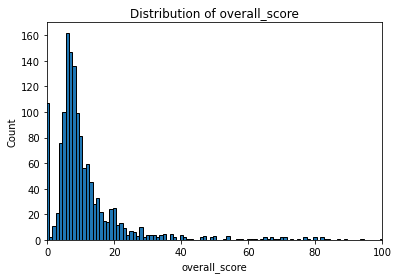

In [3]:
import matplotlib.pyplot as plt
df4 = df[['name','overall_score','intelligence_score','strength_score','speed_score',
         'durability_score','power_score','combat_score','gender']].dropna(how='all').fillna('empty').astype(str)

df4['overall_score']=df4['overall_score'].replace('∞',500)
df4['overall_score']=df4['overall_score'].replace('-',0)
df4['overall_score'].value_counts().index
df4["overall_score"] = pd.to_numeric(df4["overall_score"],errors='coerce')

plt.bar(df4['overall_score'].value_counts().index, 
        df4['overall_score'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('overall_score'); plt.ylabel('Count'); plt.title('Distribution of overall_score');
plt.xlim(0,100)

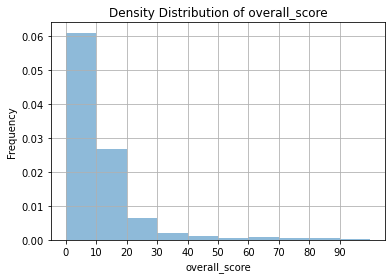

In [4]:
# we can also apply histogram directly on a column
# show result of Math course
df4['overall_score'].plot.hist(bins=10, alpha=0.5, density=True, range=(0,100))

# show setting
plt.title('Density Distribution of overall_score')
plt.xticks(np.arange(0, 100, step=10))
plt.xlabel('overall_score')
plt.grid()

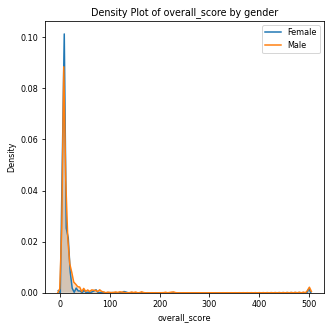

In [5]:
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (5, 5)
import seaborn as sns
from IPython.core.pylabtools import figsize
# Scipy helper functions
import scipy
from scipy.stats import percentileofscore
from scipy import stats


# overall_score distribution by gender
sns.kdeplot(df4.loc[df4['gender'] == 'Female', 'overall_score'], label = 'Female', shade = True)
sns.kdeplot(df4.loc[df4['gender'] == 'Male', 'overall_score'], label = 'Male', shade = True)
plt.xlabel('overall_score'); plt.ylabel('Density'); plt.title('Density Plot of overall_score by gender');plt.legend()

(0.0, 100.0)

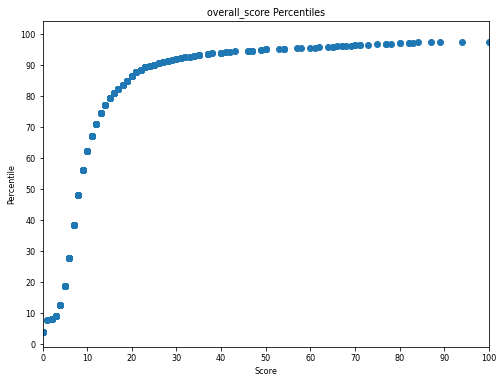

In [6]:
# Calculate percentile for grades
df4['percentile'] = df4['overall_score'].apply(lambda x: percentileofscore(df4['overall_score'], x))
# Plot percentiles for grades
plt.figure(figsize = (8, 6))
plt.plot(df4['overall_score'], df4['percentile'], 'o')
plt.xticks(range(0, 101, 10))
plt.yticks(range(0, 101, 10))
plt.xlabel('Score'); plt.ylabel('Percentile'); plt.title('overall_score Percentiles');
plt.xlim(0,100)

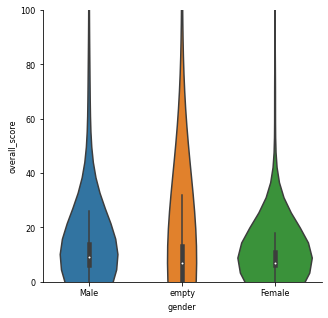

In [7]:
df4=df4.replace('[]', 'empty')
sns.violinplot(df4['gender'], df4['overall_score']) #Variable Plot
plt.ylim(0,100)
sns.despine()

## Building a Chatbot

In [68]:
# Checking for greetings
import random
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "hey")
GREETING_RESPONSES = ["hi", "hey", "hi there", "hello", "I am glad! You are talking to me"]

def greeting(sentence):
    """If user's input is a greeting, return a greeting response"""
    for word in sentence.split(): #split words in sentence to individual tokens
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES) # return random responses for greetings

In [ ]:
# Run the chatbot
flag=True
print("ROBO: My name is Robo. I will answer your queries about Superheros. If you want to exit, type Bye!")
topicSet = ['name','full_name','real_name','history_text','powers_text','superpowers',
         'place_of_birth','first_appearance','creator','alignment', 
            'base','teams','relatives','gender','type_race','eye_color','skin_color','hair_color']

while(flag==True):
    # get user input using text box
    user_response = input()
    user_response=user_response.lower()
    df_filter = df.copy()
    if(user_response != 'bye' ):
        if(user_response=='thanks' or user_response=='thank you' ):
            flag==False
            print("\n ROBO: You are welcome..Please type in name to search or bye to quit:)")
        else:
            if(greeting(user_response)!=None):
                print("\n ROBO: "+greeting(user_response)+ ". "+"You can type in any Superheros' name to check relevant information")
            else:
                if user_response in df["name"].str.lower().values:
                    print("\n ROBO: This name exits,you can type in any one of 'name','full_name','real_name','history_text','powers_text','superpowers','place_of_birth','first_appearance','creator','alignment', 'base','teams','relatives','gender','type_race','eye_color','skin_color','hair_color' to search ")
                    search_info = input()
                    if search_info in topicSet:
                        if (pd.isna(df.loc[df['name'].str.lower().values == str(user_response).lower(), search_info].values[0])):
                            print("\n ROBO: Sorry:( the superhero keep it as a secret. Please type in a name to search or type bye to exit")
                        else:
                            print("\n ROBO:" + df.loc[df['name'].str.lower().values == str(user_response).lower(), search_info].values[0])
                            print("\n Please type in a name to search ")
#                         print(df.loc[df['name'].str.lower().values == str(user_response).lower(), search_info].values[0])      
                    else: 
                        print("\n ROBO: Oops that‘s a secret. Please reinput a name or type bye to quit")
                else:
                    df_filter['name']= df_filter['name'].map(lambda x:str(x).lower())
                    df_ret=df_filter[df_filter['name'].map(lambda x: user_response in x)]
                    print(df_ret['name'])
                    print("\n ROBO: These are related names.You can type in the name to search")
                    #user_response = input()
                    # print("\n ROBO: Sorry:( this name does not exist.Please reinput a name or type bye to quit")
                    
    else:
        flag=False
        print("ROBO: Bye! take care..I will miss you!")

ROBO: My name is Robo. I will answer your queries about Superheros. If you want to exit, type Bye!


In [65]:
df2['name'].head(50)

0                           3-D Man
1                     514A (Gotham)
2                            A-Bomb
3                                Aa
4                        Aaron Cash
5                      Aayla Secura
6                        Abe Sapien
7                          Abin Sur
8                       Abomination
9                 Abra Kadabra (CW)
10                     Abra Kadabra
11                          Abraxas
12              Absorbing Man (MCU)
13                    Absorbing Man
14                       Ace Morgan
15               Achilles Warkiller
16                         Acidicus
17                            A'dal
18                      Adam Monroe
19                     Adam Strange
20                   Agent 13 (MCU)
21                         Agent 13
22                        Agent Bob
23                     Agent Carter
24    Agent Coulson (Destroyer Gun)
25              Agent Coulson (MCU)
26                  Agent May (MCU)
27                 Agent Zer

## Regression

In [9]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(123)

In [10]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression

# Splitting data into training/testing
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

In [11]:
df2.head(50)

,name,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
0,3-D Man,6,85,30,60,60,40,70
1,514A (Gotham),10,100,20,30,50,35,100
2,A-Bomb,20,80,100,80,100,100,80
3,Aa,12,80,50,55,45,100,55
4,Aaron Cash,5,80,10,25,40,30,50
5,Aayla Secura,8,90,40,45,55,55,85
6,Abe Sapien,10,95,30,35,65,100,85
7,Abin Sur,9,75,90,55,65,100,65
8,Abomination,22,85,100,80,90,100,95
9,Abra Kadabra (CW),13,100,10,20,30,100,55


In [12]:
df_X = df2.drop(columns=['overall_score','name']).astype(int)
df_y = df2[['overall_score']].astype(int)
df_X.columns

Index(['intelligence_score', 'strength_score', 'speed_score',
       'durability_score', 'power_score', 'combat_score'],
      dtype='object')

In [13]:
df_y.columns

Index(['overall_score'], dtype='object')

In [14]:
#train test split
# 75% is for training and 25% is for testing
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, 
                                                    test_size = 0.25,
                                                    random_state=123)

In [15]:
# a very simple baseline: use the median value as the prediction results
baseline = np.median(y_train)
baseline_mae = np.mean(abs(baseline - y_test))
baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
print('Baseline on test data, MAE is %0.2f' %  baseline_mae)  
print('Baseline on test data, RMSE is %0.2f' %  baseline_rmse)  

Baseline on test data, MAE is 7.87
Baseline on test data, RMSE is 29.71


In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
lr.score(X_test,y_test)

-0.3543829642241634

In [18]:
# Metrics
predictions = lr.predict(X_test)
mae = np.mean(abs(predictions - y_test))
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print('Using Linear Regression, MAE is %0.2f' %  mae)  
print('Using Linear Regression, RMSE is %0.2f' %  rmse)    

Using Linear Regression, MAE is 20.71
Using Linear Regression, RMSE is 34.11


In [19]:
print('w0:',lr.intercept_)
print('w1,w2,w3,w4,w5,w6:',lr.coef_)

w0: [-106.33043238]
w1,w2,w3,w4,w5,w6: [[ 1.00874931  0.41076556  0.55927957 -0.00832756 -0.01790613 -0.00531834]]


Overall_score = -106.330 + 1.009*intellgence_score + 0.411*strength_score + 0.560*speed_score - 0.008*durability_score - 0.018*power_score - 0.005*combat_score

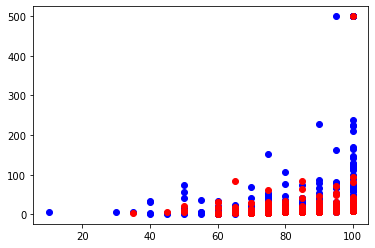

In [20]:
import matplotlib.pyplot as plt
intel_train=X_train['intelligence_score']
intel_test=X_test['intelligence_score']

plt.scatter(intel_train, y_train, color="blue", label="train data")
plt.scatter(intel_test, y_test, color="red", label="test data")

## Regression Improvement  

In [21]:
#form new dataframe needed for linear regression
df21 = df[['name','overall_score','intelligence_score','strength_score','speed_score',
         'durability_score','power_score','combat_score','history_text']].dropna(how='all').fillna('empty').astype(str)
df21 = df21[~df21['overall_score'].str.contains('-')]
df21= df21[~df21['overall_score'].isin([0])]
#replace ∞ with five times maximum value 
df21 = df21.replace('∞', '500')
df21 = df21.reset_index(drop=True)

In [22]:
corpus=[]   #每个history对应的描述就是列表中的一个元素 
for line in df21['history_text']: 
     corpus.append(str(line).replace(' \n','')) 

In [23]:
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(max_df=0.8,min_df=3)
term_matrix = pd.DataFrame(vect.fit_transform(corpus).toarray(), columns=vect.get_feature_names()) 
term_matrix

,00,000,10,100,1000,11,12,1200,12th,13,...,zombie,zombies,zone,zoo,zoom,zooms,zor,zsasz,zucco,الغول
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1339,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1340,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,32,2,0,0,0,0


In [24]:
vectorizer = CountVectorizer(max_df=0.8,min_df=3)
from sklearn.feature_extraction.text import TfidfTransformer 
transformer = TfidfTransformer() 
tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus)) 
tfidf_weight = tfidf.toarray() 
tfidf_weight.shape 

(1343, 12694)

In [25]:
vec_df = pd.DataFrame(tfidf_weight)
df_X.shape

(1343, 6)

In [26]:
df_y.shape

(1343, 1)

In [27]:
dfx = pd.concat([df21.drop(['name','history_text'],axis=1),vec_df],axis=1)

In [28]:
dfx.shape

(1343, 12701)

In [29]:
dfx

,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,0,1,2,...,12684,12685,12686,12687,12688,12689,12690,12691,12692,12693
0,6,85,30,60,60,40,70,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
1,10,100,20,30,50,35,100,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
2,20,80,100,80,100,100,80,0.0,0.0,0.000000,...,0.0,0.0,0.047366,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
3,12,80,50,55,45,100,55,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
4,5,80,10,25,40,30,50,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,10,90,10,25,30,100,55,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
1339,18,80,100,100,100,100,80,0.0,0.0,0.002997,...,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
1340,20,95,50,100,75,100,80,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.155112,0.00000,0.0,0.0,0.0,0.0
1341,9,75,10,100,30,100,30,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.631239,0.05307,0.0,0.0,0.0,0.0


In [30]:
#train test split
# 75% is for training and 25% is for testing
X_train, X_test, y_train, y_test = train_test_split(dfx, df_y, 
                                                    test_size = 0.25,
                                                    random_state=123)

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
lr.score(X_test,y_test)

0.9999999999955821

In [33]:
# Metrics
predictions = lr.predict(X_test)
mae = np.mean(abs(predictions - y_test))
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print('Using Linear Regression, MAE is %0.5f' %  mae)  
print('Using Linear Regression, RMSE is %0.5f' %  rmse) 

Using Linear Regression, MAE is 0.00004
Using Linear Regression, RMSE is 0.00006


In [34]:
print('w0:',lr.intercept_)
print('w1,w2,w3,w4,w5,w6...:',lr.coef_)

w0: [-1.03368815e-06]
w1,w2,w3,w4,w5,w6...: [[ 1.00000000e+00  7.10542736e-15  5.21804822e-15 ... -5.52443803e-07
   6.91642874e-06  1.26094114e-04]]


In [40]:
#lr.coef6=lr.coef_[:6]
#获取array维数
#print(lr.coef6.ndim)

2


In [54]:
import numpy as np
lr.coef_list=lr.coef_.tolist()
lr.coef_list

[[1.0000000000000022,
  7.105427357601002e-15,
  5.218048215738236e-15,
  2.6645352591003757e-15,
  -2.9976021664879227e-15,
  -6.106226635438361e-16,
  -4.413136522884997e-15,
  -0.0048076227711685016,
  -0.0009784548173335014,
  -0.001577669755261999,
  0.0005004348534883042,
  0.0008934857485537214,
  -0.0009899100068864808,
  0.0012619890736522421,
  0.0002203316761325361,
  -0.0002009714545989625,
  0.00019305033965725504,
  -0.0007158266202151215,
  0.00028228328201789773,
  -0.0008804721700059488,
  0.00030190123793011797,
  -8.873551496292882e-06,
  9.76932252969509e-05,
  3.425889977283857e-05,
  -6.058780465036056e-05,
  7.212396455519938e-05,
  0.0001615292411356798,
  9.12795634794884e-05,
  8.707170634956654e-05,
  -0.0002807973815303983,
  -7.026533114188519e-05,
  4.052513952592057e-05,
  7.635039924910773e-05,
  -0.0003557462540339126,
  -0.0002272913887662443,
  -0.00012854290903657745,
  -0.00011101947562598924,
  -0.0003626009560644452,
  8.535249756099337e-06,
  2.5

In [62]:
lr.co6=lr.coef_list[0][:6]
lr.co6

[1.0000000000000022,
 7.105427357601002e-15,
 5.218048215738236e-15,
 2.6645352591003757e-15,
 -2.9976021664879227e-15,
 -6.106226635438361e-16]

In [63]:
index= lr.coef6.index(max(lr.coef6))
print(value,index)

1.0000000000000022 0


In [64]:
lr.coef6.sort(reverse=True)
lr.coef6

[1.0000000000000022,
 7.105427357601002e-15,
 5.218048215738236e-15,
 2.6645352591003757e-15,
 -6.106226635438361e-16,
 -2.9976021664879227e-15]

### Classifier

In [9]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

/Users/wenyuhe/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [10]:
del_index1 = df3[df3['alignment'] == 'empti'].index
del_index2 = df3[df3['alignment'] == 'neutral'].index
df4 = df3.drop(del_index1)
df4 = df4.drop(del_index2)
df4.head(50)

,name,real_name,full_name,history_text,powers_text,alter_egos,aliases,occupation,superpowers,place_of_birth,...,base,teams,relatives,gender,type_race,eye_color,skin_color,hair_color,text_sum,history_proc
0,"[3d, man]","[delroy, garrett, jr]","[delroy, garrett, jr]","[delroy, garrett, jr, grew, becom, track, star...",[empti],[empti],[],[empti],"[super, speed, super, strength]",[empti],...,[empti],"[annihil, asgardian, aveng, new, aveng]",[empti],[male],[human],[empti],[empti],[empti],3d man delroy garrett jr delroy garrett jr del...,delroy garrett jr grew becom track star compet...
2,[abomb],"[richard, milhous, jone]","[richard, milhous, jone]","[richard, rick, jone, orphan, young, age, expe...","[rare, occas, unusu, circumst, jone, abl, tap,...",[empti],"[rick, jone]","[musician, adventur, author, former, talk, sho...","[acceler, heal, agil, berserk, mode, bloodlust...","[scarsdal, arizona]",...,[empti],"[teen, brigad, ultim, fantast, four, umen, god...","[marlo, chandlerjon, wife, polli, aunt, mrs, c...",[male],[human],[yellow],[empti],[hair],abomb richard milhous jone richard milhous jon...,richard rick jone orphan young age expel sever...
3,[aa],[aa],[empti],"[aa, one, passiv, member, pumic, peopl, race, ...",[empti],[empti],[],[empti],"[energi, absorpt, energi, armor, energi, beam,...",[stoneworld],...,[empti],"[blue, lantern, corp, green, lantern, corp, ju...",[empti],[male],[human],[empti],[empti],[empti],aa empti aa aa one passiv member pumic peopl r...,aa one passiv member pumic peopl race stonewor...
4,"[aaron, cash]","[aaron, cash]","[aaron, cash]","[aaron, cash, head, secur, arkham, asylum, hoo...",[empti],[empti],[],[empti],"[weaponbas, power, weapon, master]","[gotham, citi]",...,[empti],[empti],[empti],[male],[human],[empti],[empti],[empti],aaron cash aaron cash aaron cash aaron cash he...,aaron cash head secur arkham asylum hook hand ...
5,"[aayla, secura]","[aayla, secura]",[empti],"[ayla, secura, rutian, twilek, jedi, knight, o...",[empti],[empti],[],[empti],"[acceler, heal, agil, astral, project, cloak, ...",[empti],...,[empti],"[jedi, order]",[empti],[femal],[twilek],[empti],[empti],[empti],aayla secura empti aayla secura ayla secura ru...,ayla secura rutian twilek jedi knight onetim a...
6,"[abe, sapien]","[abraham, sapien]","[abraham, sapien]","[sapien, began, life, langdon, everett, caul, ...","[abe, humanoid, amphibi, creatur, pair, gill, ...",[empti],"[langdon, everett, caul, abraham, sapien, lang...","[paranorm, investig]","[acceler, heal, agil, cold, resist, durabl, en...",[empti],...,[empti],"[bureau, paranorm, research, defens]","[edith, howard, wife, deceas]",[male],"[icthyo, sapien]",[blue],[blue],[hair],abe sapien abraham sapien abraham sapien sapie...,sapien began life langdon everett caul victori...
7,"[abin, sur]",[empti],[empti],"[origin, histori, professor, planet, ungara, a...","[abin, sur, possess, except, strong, sens, req...",[empti],[lagzia],"[green, lantern, former, histori, professor]","[lantern, power, ring]",[ungara],...,[oa],"[legion, superhero, green, lantern, corp]","[amon, sur, son, arin, sur, sister, thaal, sin...",[male],[ungaran],[blue],[red],[hair],abin sur empti empti origin histori professor ...,origin histori professor planet ungara abin su...
8,[abomin],"[emil, blonski]","[emil, blonski]","[former, known, emil, blonski, spi, soviet, yu...","[blonski, transform, abomin, substanti, increa...","[abomin, mcu, chao, war, abomin]","[agent, r7, ravag, world]",[exspi],"[acceler, heal, adapt, agil, anim, berserk, mo...","[zagreb, yugoslavia]",...,[mobil],"[annihil, wreck, crew, master, evil, superiour...","[nadia, dornova, blonski, wife, separ]",[male],"[human, radiat]",[green],[empti],[hair],abomin emil blonski emil blonski former known ...,former known emil blonski spi soviet yugoslavi...
9,"[abra, kadabra, cw]",[unknown],[unknown],"[abra, kadabra, crimin, time, travel, 64th, ce...","[abra, kadabra, augment, various, nanotechnolo...","[alpha, bane, dark, knight, bane, new, 52, 

In [11]:
df4['label'] = df4.alignment.apply(lambda x: 1 if 'good' in x else 0)
df4.head(30)

,name,real_name,full_name,history_text,powers_text,alter_egos,aliases,occupation,superpowers,place_of_birth,...,teams,relatives,gender,type_race,eye_color,skin_color,hair_color,text_sum,history_proc,label
0,"[3d, man]","[delroy, garrett, jr]","[delroy, garrett, jr]","[delroy, garrett, jr, grew, becom, track, star...",[empti],[empti],[],[empti],"[super, speed, super, strength]",[empti],...,"[annihil, asgardian, aveng, new, aveng]",[empti],[male],[human],[empti],[empti],[empti],3d man delroy garrett jr delroy garrett jr del...,delroy garrett jr grew becom track star compet...,1
2,[abomb],"[richard, milhous, jone]","[richard, milhous, jone]","[richard, rick, jone, orphan, young, age, expe...","[rare, occas, unusu, circumst, jone, abl, tap,...",[empti],"[rick, jone]","[musician, adventur, author, former, talk, sho...","[acceler, heal, agil, berserk, mode, bloodlust...","[scarsdal, arizona]",...,"[teen, brigad, ultim, fantast, four, umen, god...","[marlo, chandlerjon, wife, polli, aunt, mrs, c...",[male],[human],[yellow],[empti],[hair],abomb richard milhous jone richard milhous jon...,richard rick jone orphan young age expel sever...,1
3,[aa],[aa],[empti],"[aa, one, passiv, member, pumic, peopl, race, ...",[empti],[empti],[],[empti],"[energi, absorpt, energi, armor, energi, beam,...",[stoneworld],...,"[blue, lantern, corp, green, lantern, corp, ju...",[empti],[male],[human],[empti],[empti],[empti],aa empti aa aa one passiv member pumic peopl r...,aa one passiv member pumic peopl race stonewor...,1
4,"[aaron, cash]","[aaron, cash]","[aaron, cash]","[aaron, cash, head, secur, arkham, asylum, hoo...",[empti],[empti],[],[empti],"[weaponbas, power, weapon, master]","[gotham, citi]",...,[empti],[empti],[male],[human],[empti],[empti],[empti],aaron cash aaron cash aaron cash aaron cash he...,aaron cash head secur arkham asylum hook hand ...,1
5,"[aayla, secura]","[aayla, secura]",[empti],"[ayla, secura, rutian, twilek, jedi, knight, o...",[empti],[empti],[],[empti],"[acceler, heal, agil, astral, project, cloak, ...",[empti],...,"[jedi, order]",[empti],[femal],[twilek],[empti],[empti],[empti],aayla secura empti aayla secura ayla secura ru...,ayla secura rutian twilek jedi knight onetim a...,1
6,"[abe, sapien]","[abraham, sapien]","[abraham, sapien]","[sapien, began, life, langdon, everett, caul, ...","[abe, humanoid, amphibi, creatur, pair, gill, ...",[empti],"[langdon, everett, caul, abraham, sapien, lang...","[paranorm, investig]","[acceler, heal, agil, cold, resist, durabl, en...",[empti],...,"[bureau, paranorm, research, defens]","[edith, howard, wife, deceas]",[male],"[icthyo, sapien]",[blue],[blue],[hair],abe sapien abraham sapien abraham sapien sapie...,sapien began life langdon everett caul victori...,1
7,"[abin, sur]",[empti],[empti],"[origin, histori, professor, planet, ungara, a...","[abin, sur, possess, except, strong, sens, req...",[empti],[lagzia],"[green, lantern, former, histori, professor]","[lantern, power, ring]",[ungara],...,"[legion, superhero, green, lantern, corp]","[amon, sur, son, arin, sur, sister, thaal, sin...",[male],[ungaran],[blue],[red],[hair],abin sur empti empti origin histori professor ...,origin histori professor planet ungara abin su...,1
8,[abomin],"[emil, blonski]","[emil, blonski]","[former, known, emil, blonski, spi, soviet, yu...","[blonski, transform, abomin, substanti, increa...","[abomin, mcu, chao, war, abomin]","[agent, r7, ravag, world]",[exspi],"[acceler, heal, adapt, agil, anim, berserk, mo...","[zagreb, yugoslavia]",...,"[annihil, wreck, crew, master, evil, superiour...","[nadia, dornova, blonski, wife, separ]",[male],"[human, radiat]",[green],[empti],[hair],abomin emil blonski emil blonski former known ...,former known emil blonski spi soviet yugoslavi...,0
9,"[abra, kadabra, cw]",[unknown],[unknown],"[abra, kadabra, crimin, time, travel, 64th, ce...","[abra, kadabra, augment, various, nanotechnolo...","[alpha, bane, dark, knight, bane, new, 52, bat...","[abra, kadabra]","[timetravel, crim

In [12]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [14]:
X, y, = df4['history_proc'], df4['label']
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y)
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

In [15]:
# Logistic Regression Classifier
LRclassifier = LogisticRegression()
LRclassifier.fit(X_train, y_train)
LRpredictions = LRclassifier.predict(X_test)

In [17]:
print("Logistic Regression Classifier: ")
LRscores = cross_val_score(LRclassifier, X_train, y_train, cv=5)
print("Avg score: ", np.mean(LRscores))
LRprecisions = cross_val_score(LRclassifier, X_train, y_train, cv=5, scoring='precision')
print('Avg precision: ', np.mean(LRprecisions))
LRrecalls = cross_val_score(LRclassifier, X_train, y_train, cv=5, scoring='recall')
print('Avg recall: ', np.mean(LRrecalls))

Logistic Regression Classifier: 
Avg score:  0.6656086481513426
Avg precision:  0.6601547235844054
Avg recall:  0.9966942148760332


In [18]:
# SVM Classifier
from sklearn import svm
from sklearn.metrics import classification_report

SVMclassifier = svm.SVC()
SVMclassifier.fit(X_train, y_train)
SVMpredictions = SVMclassifier.predict(X_test)

In [22]:
print("SVM Classifier: ")
SVMscores = cross_val_score(SVMclassifier, X_train, y_train, cv=5)
print("Avg score: ", np.mean(SVMscores))
SVMprecisions = cross_val_score(SVMclassifier, X_train, y_train, cv=5, scoring='precision')
print('Avg precision: ', np.mean(SVMprecisions))
SVMrecalls = cross_val_score(SVMclassifier, X_train, y_train, cv=5, scoring='recall')
print('Avg recall: ', np.mean(SVMrecalls))

SVM Classifier: 
Avg score:  0.6688057040998217
Avg precision:  0.6623045472769229
Avg recall:  0.9966942148760332


In [37]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

NBclf = MultinomialNB(alpha=0.01)
NBclf.fit(X_train, y_train)
NBpred = NBclf.predict(X_test)

In [23]:
print("Naive Bayes Classifier: ")
NBscores = cross_val_score(NBclf, X_train, y_train, cv=5)
print("Avg score: ", np.mean(NBscores))
NBprecisions = cross_val_score(NBclf, X_train, y_train, cv=5, scoring='precision')
print('Avg precision: ', np.mean(NBprecisions))
NBrecalls = cross_val_score(NBclf, X_train, y_train, cv=5, scoring='recall')
print('Avg recall: ', np.mean(NBrecalls))

Naive Bayes Classifier: 
Avg score:  0.7234374101546777
Avg precision:  0.758859144173955
Avg recall:  0.839297520661157


In [24]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RFclf = RandomForestClassifier(n_estimators=8)
RFclf.fit(X_train, y_train)
RFpred = RFclf.predict(X_test)

In [25]:
print("Random Forest Classifier: ")
RFscores = cross_val_score(RFclf, X_train, y_train, cv=5)
print("Avg score: ", np.mean(RFscores))
RFprecisions = cross_val_score(RFclf, X_train, y_train, cv=5, scoring='precision')
print('Avg precision: ', np.mean(RFprecisions))
RFrecalls = cross_val_score(RFclf, X_train, y_train, cv=5, scoring='recall')
print('Avg recall: ', np.mean(RFrecalls))

Random Forest Classifier: 
Avg score:  0.6591397849462365
Avg precision:  0.6937878000749661
Avg recall:  0.8410881542699725


In [26]:
# Decision Tree Classifier
from sklearn import tree
DTclf = tree.DecisionTreeClassifier()
DTclf.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
print("Decision Tree Classifier: ")
DTscores = cross_val_score(DTclf, X_train, y_train, cv=5)
print("Avg score: ", np.mean(DTscores))
DTprecisions = cross_val_score(DTclf, X_train, y_train, cv=5, scoring='precision')
print('Avg precision: ', np.mean(DTprecisions))
DTrecalls = cross_val_score(DTclf, X_train, y_train, cv=5, scoring='recall')
print('Avg recall: ', np.mean(DTrecalls))

Decision Tree Classifier: 
Avg score:  0.6291645103789316
Avg precision:  0.704126674670474
Avg recall:  0.7234573002754822


In [32]:
# Gradient Boosting Decision Tree Classifier
from sklearn.ensemble import GradientBoostingClassifier
DTclf = GradientBoostingClassifier(n_estimators=100)
DTclf.fit(X_train, y_train)

GradientBoostingClassifier()

In [33]:
print("Gradient Boosting Decision Tree Classifier: ")
DTscores = cross_val_score(DTclf, X_train, y_train, cv=5)
print("Avg score: ", np.mean(DTscores))
DTprecisions = cross_val_score(DTclf, X_train, y_train, cv=5, scoring='precision')
print('Avg precision: ', np.mean(DTprecisions))
DTrecalls = cross_val_score(DTclf, X_train, y_train, cv=5, scoring='recall')
print('Avg recall: ', np.mean(DTrecalls))

Gradient Boosting Decision Tree Classifier: 
Avg score:  0.6741762980852164
Avg precision:  0.6859519446627944
Avg recall:  0.8890495867768596


In [30]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
KNNclf = KNeighborsClassifier()
KNNclf.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
print("KNN Classifier: ")
KNNscores = cross_val_score(KNNclf, X_train, y_train, cv=5)
print("Avg score: ", np.mean(KNNscores))
KNNprecisions = cross_val_score(KNNclf, X_train, y_train, cv=5, scoring='precision')
print('Avg precision: ', np.mean(KNNprecisions))
KNNrecalls = cross_val_score(KNNclf, X_train, y_train, cv=5, scoring='recall')
print('Avg recall: ', np.mean(KNNrecalls))

KNN Classifier: 
Avg score:  0.7009257662009085
Avg precision:  0.7251785012981151
Avg recall:  0.8674931129476583


In [114]:
# Changing test size
X, y, = df4['history_proc'], df4['label']
X_train_raw1, X_test_raw1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.20, random_state = 5)
vectorizer = TfidfVectorizer(stop_words='english')
X_train1 = vectorizer.fit_transform(X_train_raw1)
X_test1 = vectorizer.transform(X_test_raw1)
# Naive Bayes Classifier
NBclf1 = MultinomialNB(alpha=0.01)
NBclf1.fit(X_train1, y_train1)
NBpred1 = NBclf1.predict(X_test1)
# Score
print("Naive Bayes Classifier: ")
NBscores1 = cross_val_score(NBclf1, X_train1, y_train1, cv=5)
print("Avg score: ", np.mean(NBscores1))
NBprecisions1 = cross_val_score(NBclf1, X_train1, y_train1, cv=5, scoring='precision')
print('Avg precision: ', np.mean(NBprecisions1))
NBrecalls1 = cross_val_score(NBclf1, X_train1, y_train1, cv=5, scoring='recall')
print('Avg recall: ', np.mean(NBrecalls1))

Naive Bayes Classifier: 
Avg score:  0.7527638190954773
Avg precision:  0.7781337676374674
Avg recall:  0.8711332941867292


In [40]:
# calculate size of vocabulary
allText = []
for index, row in df4.iterrows():
    allText += row["history_text"]
allText = list(set(allText))
print("size of vocabulary: ", len(allText))

size of vocabulary:  21490


In [121]:
# Grid Search for Naive Bayes Classifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score

pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english', sublinear_tf = True)),
    ('clf', MultinomialNB(alpha=0.01))
])
parameters = {
    'vect__max_df': (0.4, 0.6, 0.8, 1), 
    'vect__max_features': (5000, 10000, 15000, None),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'clf__fit_prior': (True, False),
    'clf__alpha': (0.1, 0.5, 1, 2)
}

if __name__ == "__main__":
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=3)
    X, y, = df4['history_proc'], df4['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)
    grid_search.fit(X_train, y_train)
    print('Best score: %0.3f' % grid_search.best_score_)
    print('Best parameters set:')
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print('\t%s: %r' % (param_name, best_parameters[param_name]))
    predictions = grid_search.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, predictions))
    print('Precision:', precision_score(y_test, predictions))
    print('Recall:', recall_score(y_test, predictions))

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed:  3.2min finished


Best score: 0.766
Best parameters set:
	clf__alpha: 0.1
	clf__fit_prior: False
	vect__max_df: 0.6
	vect__max_features: 5000
	vect__ngram_range: (1, 2)
Accuracy: 0.7429718875502008
Precision: 0.7615894039735099
Recall: 0.8041958041958042


In [127]:
# Example of predicting
raw = ["X has a happy family with many good friends."]
result = grid_search.predict(raw)
alm = "Good" if result == 1 else "Bad"
print("Story: ", raw[0])
print("Alignment of hero: ", alm)
print("Probability of correct prediction: ", grid_search.predict_proba(raw)[0][result][0])

Story:  X has a happy family with many good friends.
Alignment of hero:  Good
Probability of correct prediction:  0.5561182845450473


In [128]:
raw = ["His mother is a killer. He always hate his father. "]
result = grid_search.predict(raw)
alm = "Good" if result == 1 else "Bad"
print("Story: ", raw[0])
print("Alignment of hero: ", alm)
print("Probability of correct prediction: ", grid_search.predict_proba(raw)[0][result][0])

Story:  His mother is a killer. He always hate his father. 
Alignment of hero:  Bad
Probability of correct prediction:  0.5801108794076918


### Clustering

In [85]:
df4= df[['name','real_name','full_name','history_text','powers_text','alter_egos','aliases','occupation','superpowers',
         'place_of_birth','first_appearance','creator','alignment', 'base',
         'teams','relatives','gender','type_race','eye_color','skin_color','hair_color']].dropna(how='all').fillna('empty').astype(str)
df4=df4.replace('[]', 'empty')
df4 = df4.applymap(lambda c:clean(c)) 
df4 = df4.applymap(lambda t:word_tokenize(t)) 
df4= df4.applymap(lambda x:[word for word in x if word not in stop_words])  
df3['superpowers'] = df3[['superpowers']].applymap(lambda j:joinText(j)) 
df4['superpowers'] = df4[['superpowers']].applymap(lambda j:joinText(j))  

In [86]:
corpus = list(df3['superpowers'])
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus)
fetaure_names = tfidf_vectorizer.get_feature_names()

In [132]:
from sklearn.cluster import KMeans
distortions = []
list_k = [i for i in range(2,30)]
for k in list_k :
    model = KMeans(n_clusters = k, init='k-means++' )
    model.fit(tfidf)
    distortions.append(model.inertia_)

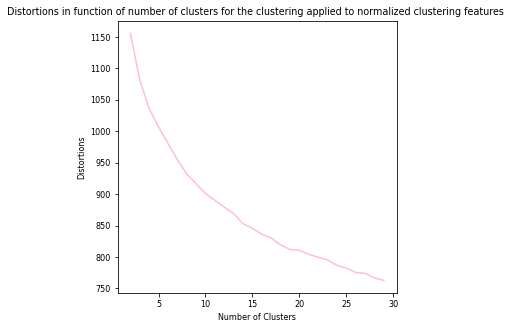

In [133]:
elbow_data = pd.DataFrame({'Number of clusters':list_k ,'Distortions':distortions})
sns.lineplot(x='Number of clusters', y='Distortions', data = elbow_data, color = 'pink')
plt.title('Distortions in function of number of clusters for the clustering applied to normalized clustering features ')
plt.xlabel('Number of Clusters')
plt.ylabel("Distortions")
plt.show()

In [91]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stem.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

Below we use stemming/tokenizing and tokenizing functions to iterate over the list of synopses to create two vocabularies: one stemmed and one only tokenized.

In [92]:
for i in df3['superpowers']:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
for i in df4['superpowers']:
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [93]:
print('totalvocab_tokenized: ', totalvocab_tokenized[:15])
print('totalvocab_stemmed:   ', totalvocab_stemmed[:15])

totalvocab_tokenized:  ['delroy', 'garrett', 'jr', 'grew', 'become', 'track', 'star', 'competed', 'olympic', 'games', 'tested', 'positive', 'steroids', 'lost', 'three']
totalvocab_stemmed:    ['delroy', 'garrett', 'jr', 'grew', 'becom', 'track', 'star', 'compet', 'olymp', 'game', 'test', 'posit', 'steroid', 'lost', 'three']


Using these two lists, we create a pandas DataFrame with the stemmed vocabulary as the index and the tokenized words as the column. The benefit of this is it provides an efficient way to look up a stem and return a full token. The downside here is that stems to tokens are one to many: the stem 'run' could be associated with 'ran', 'runs', 'running', etc. For our purposes this is fine--we are happy returning the first token associated with the stem we need to look up.

In [94]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
vocab_frame.head()

,words
delroy,delroy
garrett,garrett
jr,jr
grew,grew
becom,become


In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
nltk_stopwords = set(nltk.corpus.stopwords.words('english'))


tfidf_vectorizer = TfidfVectorizer(max_df=0.95, max_features=100,
                                 min_df=0.05, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

# %time is built-in magic command; https://ipython.org/ipython-doc/3/interactive/magics.html 
corpus = list(df3['superpowers'])
%time tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

print(tfidf_matrix.shape)

/Users/lyu009/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


CPU times: user 689 ms, sys: 8.23 ms, total: 697 ms
Wall time: 708 ms
(1450, 100)


In [125]:
terms = tfidf_vectorizer.get_feature_names()
print(terms)

['absorpt', 'absorpt energi', 'accel', 'accel heal', 'accel heal agil', 'agil', 'anim', 'blast', 'blast energi', 'cold', 'cold resist', 'condit', 'control', 'control resist', 'dexter', 'dimens', 'disea', 'disea resist', 'durabl', 'durabl endur', 'element', 'endur', 'energi', 'energi absorpt', 'energi absorpt energi', 'energi blast', 'energi blast energi', 'energi manipul', 'enhanc', 'enhanc hear', 'enhanc hear enhanc', 'enhanc sen', 'enhanc sen enhanc', 'enhanc sight', 'field', 'flight', 'forc', 'forc field', 'heal', 'heal agil', 'hear', 'hear enhanc', 'heat', 'heat resist', 'human', 'human condit', 'immort', 'intellig', 'invuln', 'jump', 'longev', 'magic', 'manipul', 'marksmanship', 'master', 'mind', 'mind control', 'natur', 'peak', 'peak human', 'peak human condit', 'power', 'power weapon', 'power weapon master', 'reflex', 'reflex stamina', 'regen', 'resist', 'selfsusten', 'sen', 'sen enhanc', 'shapeshift', 'sight', 'speed', 'speed super', 'speed super strength', 'stamina', 'stamina 

In [126]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [127]:
import numpy as np
from sklearn.cluster import KMeans
import random

np.random.seed(1234)
num_clusters = 10
km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

CPU times: user 980 ms, sys: 118 ms, total: 1.1 s
Wall time: 231 ms


In [128]:
km.inertia_

722.0625448812162

In [129]:
# Coordinates of cluster centers
km.cluster_centers_  

array([[0.00838281, 0.00105895, 0.01405363, 0.01409803, 0.01402558,
        0.11713697, 0.02786824, 0.00837757, 0.        , 0.00500174,
        0.00500174, 0.24369192, 0.05115297, 0.00549951, 0.06529163,
        0.00660387, 0.01253598, 0.01179026, 0.08228327, 0.06981917,
        0.02133715, 0.08944062, 0.02855323, 0.00236766, 0.00106102,
        0.00854402, 0.        , 0.01783498, 0.02576132, 0.        ,
        0.        , 0.01670873, 0.00118163, 0.00435682, 0.00721589,
        0.01112506, 0.00699911, 0.00721589, 0.01409803, 0.01402558,
        0.        , 0.        , 0.00679553, 0.00363214, 0.24369192,
        0.24369192, 0.00560177, 0.10485956, 0.0071537 , 0.01241483,
        0.02624514, 0.01841422, 0.03653305, 0.1280474 , 0.14811151,
        0.01005884, 0.01016643, 0.00422471, 0.24369192, 0.24369192,
        0.24369192, 0.11541175, 0.12998407, 0.12998407, 0.10748139,
        0.10090224, 0.00888592, 0.02658367, 0.001039  , 0.03313888,
        0.0011677 , 0.01294328, 0.00435682, 0.01

In [130]:
#from sklearn.externals import joblib
import joblib

joblib.dump(km,  'doc_km_cluster.pkl')  # save the km model
km = joblib.load('doc_km_cluster.pkl')  # load the saved model
clusters = km.labels_.tolist()

In [131]:
from __future__ import print_function

print("Top terms per cluster:")
print()

order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :6]:  # get indexes for the 6 most important terms in current cluster
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print()
    print()

Top terms per cluster:

Cluster 0 words: b'condition', b'human', b'peak', b'peak', b'human', b'peak',

Cluster 1 words: b'enhanced', b'vision', b'hears', b'enhanced', b'senses', b'enhanced',

Cluster 2 words: b'super', b'strength', b'super', b'speed', b'super', b'speed',

Cluster 3 words: b'intelligence', b'powers', b'telepathy', b'flight', b'teleported', b'animal',

Cluster 4 words: b'controls', b'manipulated', b'mind', b'mind', b'energy', b'resistance',

Cluster 5 words: b'weaponbased', b'weaponbased', b'powers', b'weaponbased', b'powers', b'powers',

Cluster 6 words: b'resistance', b'super', b'heat', b'cold', b'cold', b'controls',

Cluster 7 words: b'energy', b'blast', b'energy', b'absorption', b'manipulated', b'energy',

Cluster 8 words: b'master', b'weapon', b'weapon', b'marksmanship', b'stealth', b'agility',

Cluster 9 words: b'super', b'healing', b'accelerate', b'accelerate', b'accelerate', b'healing',

